<a href="https://colab.research.google.com/github/Hemantpatidar1/Task2-and-Task3-Cyber-wave-/blob/main/Hemant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   id event  dateStamp  timeStamp voyage_From      lat       lon  imo_num  \
0   1  SOSP      43831   0.708333      Port A  34.0522 -118.2437  9434761   
1   2  EOSP      43831   0.791667      Port A  34.0522 -118.2437  9434761   
2   3  SOSP      43832   0.333333      Port B  36.7783 -119.4179  9434761   
3   4  EOSP      43832   0.583333      Port B  36.7783 -119.4179  9434761   

  voyage_Id allocatedVoyageId prev_event  prev_lat  prev_lon  prev_dateStamp  \
0         6              None       None       NaN       NaN             NaN   
1         6              None       SOSP   34.0522 -118.2437         43831.0   
2         6              None       EOSP   34.0522 -118.2437         43831.0   
3         6              None       SOSP   36.7783 -119.4179         43832.0   

   prev_timeStamp  distance_travelled  sailing_time  port_stay_duration  
0             NaN                 NaN           NaN                 NaN  
1        0.708333                 NaN           NaN            2.

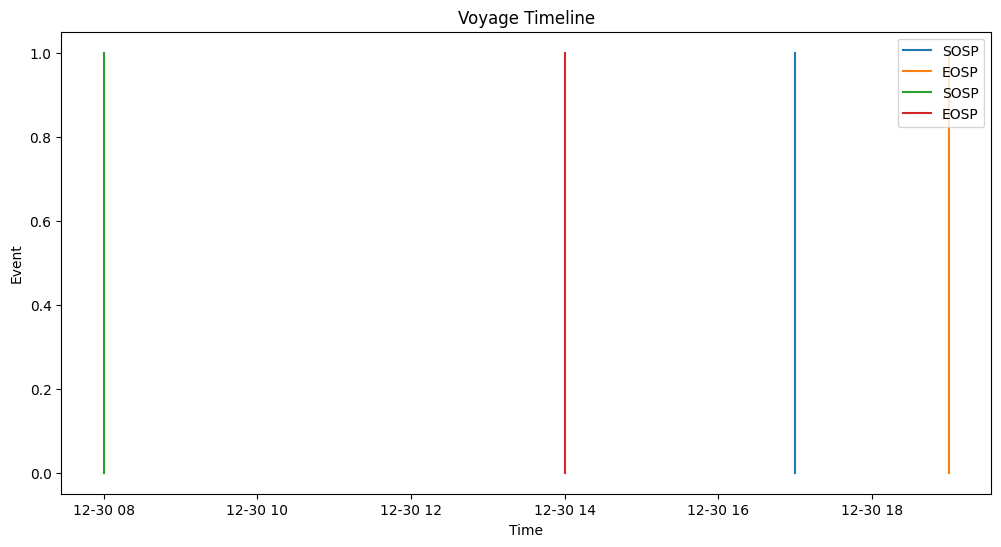

In [ ]:
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, atan2
import matplotlib.pyplot as plt


data = {
    'id': [1, 2, 3, 4],
    'event': ['SOSP', 'EOSP', 'SOSP', 'EOSP'],
    'dateStamp': [43831, 43831, 43832, 43832],
    'timeStamp': [0.708333, 0.791667, 0.333333, 0.583333],
    'voyage_From': ['Port A', 'Port A', 'Port B', 'Port B'],
    'lat': [34.0522, 34.0522, 36.7783, 36.7783],
    'lon': [-118.2437, -118.2437, -119.4179, -119.4179],
    'imo_num': ['9434761', '9434761', '9434761', '9434761'],
    'voyage_Id': ['6', '6', '6', '6'],
    'allocatedVoyageId': [None, None, None, None]
}


df = pd.DataFrame(data)


def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c / 1.852
    return distance


df['prev_event'] = df['event'].shift(1)
df['prev_lat'] = df['lat'].shift(1)
df['prev_lon'] = df['lon'].shift(1)
df['prev_dateStamp'] = df['dateStamp'].shift(1)
df['prev_timeStamp'] = df['timeStamp'].shift(1)

# Calculate distances and times
df['distance_travelled'] = df.apply(lambda row: calculate_distance(row['lat'], row['lon'], row['prev_lat'], row['prev_lon'])
                                    if row['prev_event'] == 'EOSP' and row['event'] == 'SOSP' else None, axis=1)
df['sailing_time'] = df.apply(lambda row: ((row['dateStamp'] - row['prev_dateStamp']) * 24 + (row['timeStamp'] - row['prev_timeStamp']) * 24)
                              if row['prev_event'] == 'EOSP' and row['event'] == 'SOSP' else None, axis=1)
df['port_stay_duration'] = df.apply(lambda row: ((row['dateStamp'] - row['prev_dateStamp']) * 24 + (row['timeStamp'] - row['prev_timeStamp']) * 24)
                                    if row['prev_event'] == 'SOSP' and row['event'] == 'EOSP' else None, axis=1)


print(df)


df['timestamp'] = pd.to_datetime(df['dateStamp'], origin='1899-12-30') + pd.to_timedelta(df['timeStamp'], unit='D')
plt.figure(figsize=(12, 6))
for index, row in df.iterrows():
    plt.plot([row['timestamp'], row['timestamp']], [0, 1], label=row['event'])

plt.xlabel('Time')
plt.ylabel('Event')
plt.title('Voyage Timeline')
plt.legend(loc='upper right')
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from scipy import stats


data = {
    'transaction_id': ['TRX001', 'TRX002', 'TRX003', 'TRX004', 'TRX005', 'TRX006', 'TRX007'],
    'date': ['2024-06-01', '2024-06-01', '2024-06-01', '2024-06-02', '2024-06-02', '2024-06-03', '2024-06-03'],
    'category': ['Food', 'Utilities', 'Entertainment', 'Food', 'Transport', 'Utilities', 'Food'],
    'amount': [25.00, 150.00, 200.00, 3000.00, 45.00, 135.00, 20.00]
}


df = pd.DataFrame(data)


df['date'] = pd.to_datetime(df['date'])

def detect_anomalies(df, threshold=3):
    anomalies = []
    for category in df['category'].unique():
        category_df = df[df['category'] == category]


        mean = category_df['amount'].mean()
        std = category_df['amount'].std()


        print(f"Category: {category}")
        print(f"Mean: {mean}")
        print(f"Standard Deviation: {std}")

        if std == 0:
            continue


        z_scores = (category_df['amount'] - mean) / std


        print(f"Z-scores:\n{z_scores}")

        category_anomalies = category_df[np.abs(z_scores) > threshold]
        for index, row in category_anomalies.iterrows():
            anomalies.append({
                'transaction_id': row['transaction_id'],
                'date': row['date'].strftime('%Y-%m-%d'),
                'category': row['category'],
                'amount': row['amount'],
                'reason_for_anomaly': f'{z_scores.loc[index]:.2f} standard deviations from the mean'
            })
    return anomalies

anomalies = detect_anomalies(df, threshold=3)


if anomalies:
    for anomaly in anomalies:
        print(anomaly)
else:
    print("No anomalies detected")


report = pd.DataFrame(anomalies)
print(report)


Category: Food
Mean: 1015.0
Standard Deviation: 1719.0622443646419
Z-scores:
0   -0.575895
3    1.154699
6   -0.578804
Name: amount, dtype: float64
Category: Utilities
Mean: 142.5
Standard Deviation: 10.606601717798213
Z-scores:
1    0.707107
5   -0.707107
Name: amount, dtype: float64
Category: Entertainment
Mean: 200.0
Standard Deviation: nan
Z-scores:
2   NaN
Name: amount, dtype: float64
Category: Transport
Mean: 45.0
Standard Deviation: nan
Z-scores:
4   NaN
Name: amount, dtype: float64
No anomalies detected
Empty DataFrame
Columns: []
Index: []


In [ ]:
import pandas as pd
import numpy as np


data = {
    'transaction_id': ['TRX001', 'TRX002', 'TRX003', 'TRX004', 'TRX005', 'TRX006', 'TRX007'],
    'date': ['2024-06-01', '2024-06-01', '2024-06-01', '2024-06-02', '2024-06-02', '2024-06-03', '2024-06-03'],
    'category': ['Food', 'Utilities', 'Entertainment', 'Food', 'Transport', 'Utilities', 'Food'],
    'amount': [25.00, 150.00, 200.00, 3000.00, 45.00, 135.00, 20.00]
}


df = pd.DataFrame(data)


df['date'] = pd.to_datetime(df['date'])


def detect_anomalies(df, threshold=3):
    anomalies = []
    for category in df['category'].unique():
        category_df = df[df['category'] == category]

        mean = category_df['amount'].mean()
        std = category_df['amount'].std()

        print(f'Category: {category}, Mean: {mean}, Std: {std}')

        if np.isnan(std):
            print(f'Skipping category {category} due to NaN std')
            continue

        category_df.loc[:, 'z_score'] = (category_df['amount'] - mean) / std

        category_anomalies = category_df[np.abs(category_df['z_score']) > threshold]
        for index, row in category_anomalies.iterrows():
            reason = f"{row['z_score']:.2f} standard deviations from the mean"
            anomalies.append({
                'transaction_id': row['transaction_id'],
                'date': row['date'].strftime('%Y-%m-%d'),
                'category': row['category'],
                'amount': row['amount'],
                'reason_for_anomaly': reason
            })
    return anomalies

anomalies = detect_anomalies(df, threshold=3)


report = pd.DataFrame(anomalies)
if not report.empty:
    print(report.to_string(index=False))
else:
    print("No anomalies detected")




Category: Food, Mean: 1015.0, Std: 1719.0622443646419
Category: Utilities, Mean: 142.5, Std: 10.606601717798213
Category: Entertainment, Mean: 200.0, Std: nan
Skipping category Entertainment due to NaN std
Category: Transport, Mean: 45.0, Std: nan
Skipping category Transport due to NaN std
No anomalies detected


<ipython-input-10-991b1cb479df>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df.loc[:, 'z_score'] = (category_df['amount'] - mean) / std
<ipython-input-10-991b1cb479df>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df.loc[:, 'z_score'] = (category_df['amount'] - mean) / std


In [ ]:
import pandas as pd


data = {
    'transaction_id': ['TRX001', 'TRX002', 'TRX003', 'TRX004', 'TRX005', 'TRX006', 'TRX007'],
    'date': ['2024-06-01', '2024-06-01', '2024-06-01', '2024-06-02', '2024-06-02', '2024-06-03', '2024-06-03'],
    'category': ['Food', 'Utilities', 'Entertainment', 'Food', 'Transport', 'Utilities', 'Food'],
    'amount': [25.00, 150.00, 200.00, 3000.00, 45.00, 135.00, 20.00]
}

df = pd.DataFrame(data)

category_stats = df.groupby('category')['amount'].agg(['mean', 'std'])

category_stats['threshold'] = category_stats['mean'] + 5 * category_stats['std']

def detect_anomalies(row):
    category = row['category']
    amount = row['amount']
    threshold = category_stats.loc[category, 'threshold']

    if amount > threshold:
        return True
    else:
        return False


df['is_anomaly'] = df.apply(detect_anomalies, axis=1)

print(df)

anomalies = df[df['is_anomaly']]

if anomalies.empty:
    print("No anomalies detected")
else:
    print("Anomalies detected:")
    print(anomalies[['transaction_id', 'date', 'category', 'amount']])


  transaction_id        date       category  amount  is_anomaly
0         TRX001  2024-06-01           Food    25.0       False
1         TRX002  2024-06-01      Utilities   150.0       False
2         TRX003  2024-06-01  Entertainment   200.0       False
3         TRX004  2024-06-02           Food  3000.0       False
4         TRX005  2024-06-02      Transport    45.0       False
5         TRX006  2024-06-03      Utilities   135.0       False
6         TRX007  2024-06-03           Food    20.0       False
No anomalies detected


In [ ]:
import numpy as np

def detect_anomalies_iqr(row):
    category = row['category']
    amount = row['amount']
    q1 = category_stats.loc[category, 'q1']
    q3 = category_stats.loc[category, 'q3']
    iqr = q3 - q1  # Calculate IQR
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    if amount < lower_bound or amount > upper_bound:
        return True
    else:
        return False

category_stats['q1'] = df.groupby('category')['amount'].quantile(0.25)
category_stats['q3'] = df.groupby('category')['amount'].quantile(0.75)

df['is_anomaly_iqr'] = df.apply(detect_anomalies_iqr, axis=1)

anomalies_iqr = df[df['is_anomaly_iqr']]

if anomalies_iqr.empty:
    print("No anomalies detected using IQR")
else:
    print("Anomalies detected using IQR:")
    print(anomalies_iqr[['transaction_id', 'date', 'category', 'amount']])


No anomalies detected using IQR
